Accuracy sur le test : 0.93


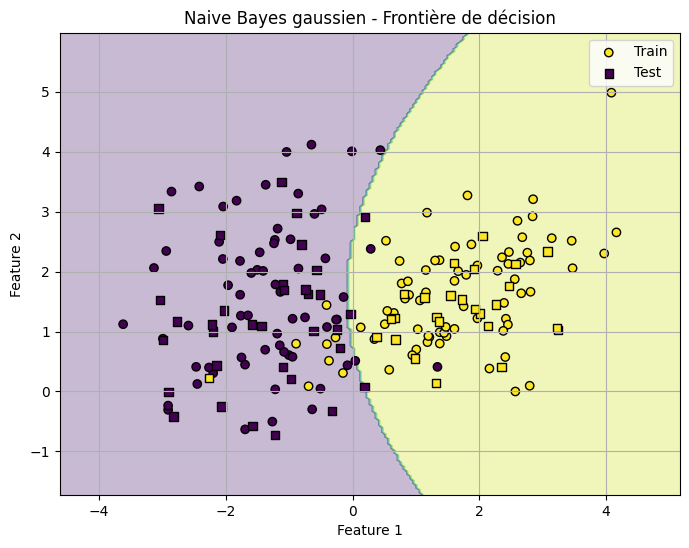

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1) Génération d'un dataset 2D simple
#   - n_features=2 → facile à visualiser dans un plan (x1, x2)
#   - n_classes=2 → deux classes (0 et 1)
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    class_sep=1.5,
    random_state=42
)

# 2) Split train / test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3) Définition et entraînement du modèle Naive Bayes gaussien
model = GaussianNB()
model.fit(X_train, y_train)

# 4) Évaluation simple sur le test set
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy sur le test : {acc:.2f}")

# 5) Création d'une grille pour visualiser la frontière de décision
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# On crée une grille de points (xx, yy) couvrant tout l'espace des données
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

# On prédit la classe de chaque point de la grille
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid_points)
Z = Z.reshape(xx.shape)

# 6) Affichage
plt.figure(figsize=(8, 6))

# a) Afficher les régions de décision (fond coloré)
plt.contourf(xx, yy, Z, alpha=0.3)

# b) Afficher les points d'entraînement
plt.scatter(
    X_train[:, 0], X_train[:, 1],
    c=y_train, edgecolor='k', marker='o', label='Train'
)

# c) Afficher les points de test
plt.scatter(
    X_test[:, 0], X_test[:, 1],
    c=y_test, edgecolor='k', marker='s', label='Test'
)

plt.title("Naive Bayes gaussien - Frontière de décision")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()
